# Executive Summary

After utilizing a K-Nearest Neighbors classifier, we put it into a confusion matrix. Just by looking at the confusion matrix, our classifier looked like it did a pretty decent job at correctly identifying genres by features. However, when we went to calculate our accuracy score we found that it was around 49%. While our classifier was not entirely successful, we still wanted to talk a look at feature importance through a Random Forest Classifier. From our feature importance chart we saw that the ``'the chroma_stft'`` feature held the most weight when it came to predicting genres, and the ``'tempo'`` feature had the least weight. However, because our accuracy score was considerably low, we must interpret these results with caution. 

# Introduction 

In the music industry today, it is no secret that a lot of songs sound similar to each other. This phenomenon is commonly referred to as the ['pop music formula'](https://www.englishclub.com/vocabulary/music-pop.php#:~:text=Songs%20that%20become%20hits%20almost,and%20two%20or%20more%20verses.) or the 'top hit formula'. From a musical standpoint, its easier to understand why exactly this phenomenon is so common in todays pop culture (popular chord progressions/simpler catchier songs), but what about from a more technical viewpoint? What characteristics, on an audio-signal level, define a 'popular' song? What characteristics define specific genres? 

For this project, we want to be able to predict the genre of a sampled audio file/song based on audio-signal characteristics given in a dataset. We will be doing this by training on said dataset and utilizing the K-Nearest Neighbors Classification. We also want to look at feauture importance through a Random Forest Classification so we can determine what audio-signal characteristics are critical in correctly identifying a genre. 

# Data Description

In [1]:
import pandas as pd

# using the kaggle csv
df = pd.read_csv('music_feats.csv')
# cleaning up data! We only want features that we feel are important and that we can explain. 
df = df[['tempo','beats','chroma_stft','rmse','spectral_centroid', 'spectral_bandwidth','rolloff','zero_crossing_rate']]
df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480


In [2]:
import plotly.graph_objects as go

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=df['tempo'],\
    y=df['beats'],
    z=df['chroma_stft'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['rmse'],
        colorscale='Viridis',
        opacity=0.8
    ),
     text=df['spectral_centroid'] 
)])

# Update the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis_title='Tempo',
        yaxis_title='Beats',
        zaxis_title='Chroma STFT'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()

We wanted to include a graph with as many features as possible shoved into one, so we constructed this 3D visualzation thats interactive. XYZ values are all labeled and color is determined by the ``'rmse'`` feature. 

You can look at our graph [here](https://ibb.co/gzS6S9M) for context.

In addition to combining as many features as possible into one graph, we found that it would be helpful to split them up too! So the image in the link above shows each feature plotted on a subplot and the units. This was pretty helpful in seeing how similar or different certain features/characteristics were, and it gave us a slightly better understanding as to what relationships they may have with eachother. 

# Method

For our methods, we utilized K-Nearest Neighbors as mentioned above, as well as feature importance through a Random Forest classifier. This was because we wanted to see if we could predict the genre of a song based on the audio-signal characteristics, and we also wanted to determine what features were most important in determining the the genre of a song. These two methods would be extremely valuable in terms of carrying out our plans. 

# Results 

In [6]:
# using the kaggle csv
df = pd.read_csv('music_feats.csv')

# get the genres in a df
df_true = df['label']

# clean the data
features = ['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']
df = df[features]

df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480


In [7]:
# scale normalization - maybe don't?
df_scaled = pd.DataFrame()
for feat in df.columns:
    df_scaled[feat] = df[feat] / df[feat].std()
df = df_scaled

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from copy import copy
from sklearn.metrics import accuracy_score


k = 9
x = df.values
y_true = df_true.values

knn_classifier = KNeighborsClassifier(n_neighbors=k)

kfold = KFold(n_splits=8, shuffle=True)
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
        
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

acc_score = accuracy_score(y_true, y_pred)
print("Accuracy score:", acc_score)

Accuracy score: 0.492


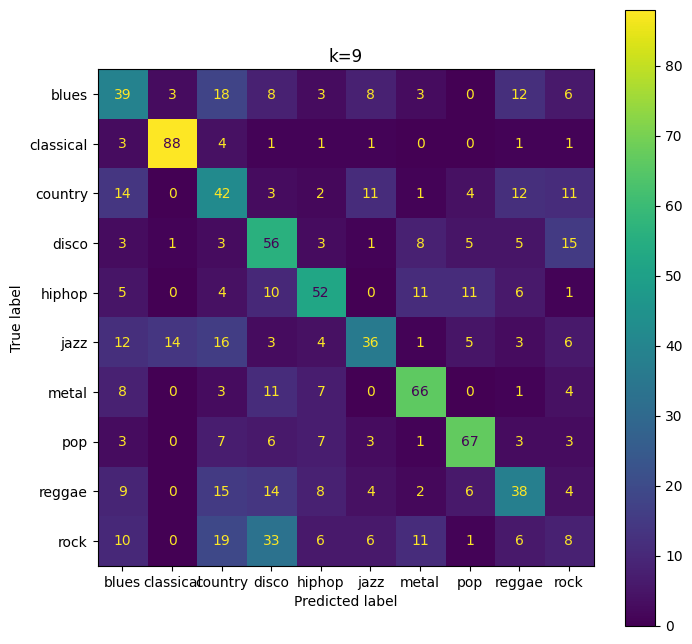

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(8, 8)
plt.title(f'k={k}')

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

Accuracy score: 0.488


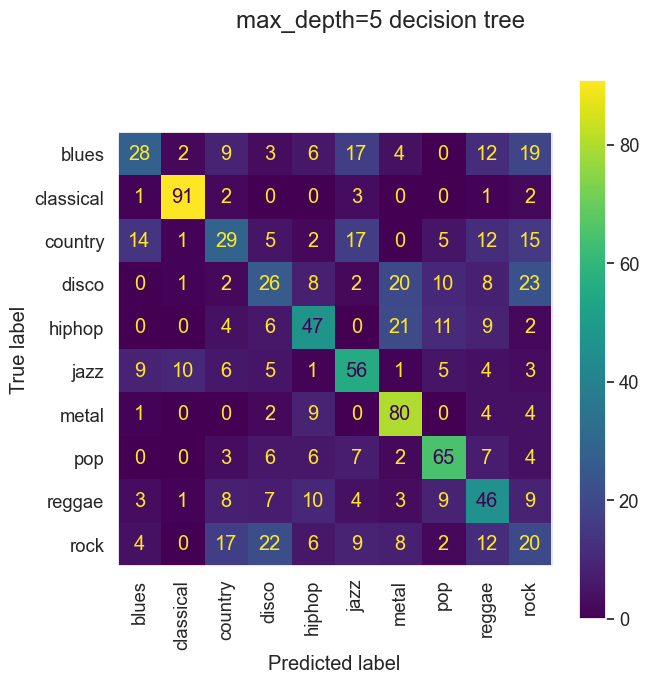

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

n_splits = 15
max_depth = 5

y = df_true
y_feat_list = np.unique(y)

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize random forest
dec_tree_clf = RandomForestClassifier(max_depth=max_depth)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)
    

# build and plot confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_feat_list)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=5 decision tree')
plt.xticks(rotation=90)

acc_score = accuracy_score(y, y_pred)
print(f'Accuracy score: {acc_score}')

In [16]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

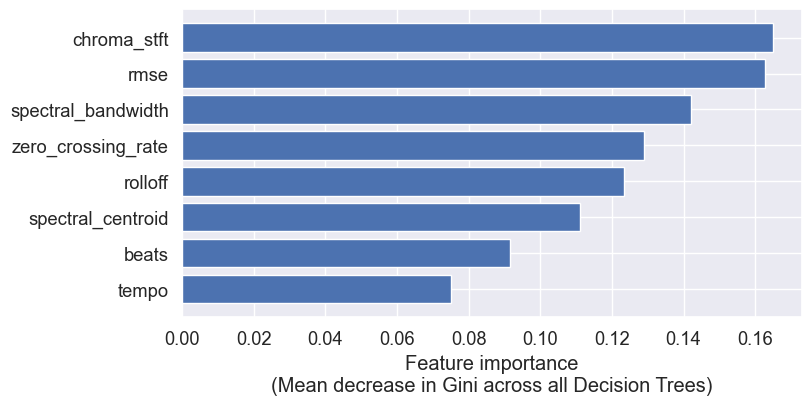

In [22]:
sns.set(font_scale=1.2)

# number of decision trees in the forest
n_estimators = 100
rf_clf = RandomForestClassifier(n_estimators=n_estimators)

# fit random forest to data
rf_clf.fit(x, y)

plot_feat_import(features, rf_clf.feature_importances_)
plt.gcf().set_size_inches(8, 4)

# Discussion

From our first confusion matrix, we can see that there was some success when our KNN Classifier predicted genres based off of the audio-signal features. However, upon calculating our accuracy score 

Method (2%) Discuss which Machine Learning method you’re applying and how it is valuable towards your initial goal.

Results (2%)
Apply the ML method(s) of your choice and graph results.

At least one graph of your ML results. All graphs should be “self-contained” in that the title, axis labels, legend, caption, or other graph elements are sufficient to understand the meaning of the graph without referring to the text of the document.

Beautiful software which is clearly documented and elegantly implemented.

Discussion (2%)

Interpret your results in the context of the application context

Are they ground-breaking or expected? Would this be a surprise to folks in this field? Should your results be accepted at face value, why or why not? (e.g. any dataset bias or methodological issue?)

Takeaway: In your opinion, after the analysis has been conducted, what actions (if any) might be taken as a result of your project? How confident are you that these actions are justified? What questions might you have to answer before such an action is taken

Discuss the most salient ethical implication of your project